In [84]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv("train.csv").dropna(subset=["Survived", "Sex", "Pclass", "Age"])

In [3]:
titanic.shape

(714, 12)

In [4]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanic["gender"] = titanic.Sex.map({'male':0, 'female':1})

In [23]:
titanic_short = titanic[["Pclass", "gender", "Age"]].dropna()


In [24]:
titanic_short.values

array([[  3.,   0.,  22.],
       [  1.,   1.,  38.],
       [  3.,   1.,  26.],
       ..., 
       [  1.,   1.,  19.],
       [  1.,   0.,  26.],
       [  3.,   0.,  32.]])

In [26]:
titanic[["Survived"]].values.shape, titanic_short.shape

((714, 1), (714, 3))

# first split

### split by gender

In [174]:
print ("Survived fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 0).sum(),
     ((titanic_short.gender.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.gender.values == 1).sum()))

Survived fraction
 M     F 
 0.21 0.75


In [173]:
print ("Died fraction\n M     F \n {0:.2f} {1:.2f}".format
    (((titanic_short.gender.values == 0) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.gender.values == 0).sum(),
       ((titanic_short.gender.values == 1) & (titanic.Survived.values == 0)).sum() * 1.0 / 
      (titanic_short.gender.values == 1).sum()))

Died fraction
 M     F 
 0.79 0.25


### split by age (at 6.5)

In [172]:
print ("Survived fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Age.values <=6.5).sum()))

Survived fraction
 >6.5  <6.5 
 0.39  0.70


In [171]:
print ("Died fraction\n >6.5  <6.5 \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Age.values >6.5) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.Age.values >6.5).sum(),
      ((titanic_short.Age.values <=6.5) & (titanic.Survived.values == 0)).sum() * 1.0 / 
       (titanic_short.Age.values <=6.5).sum()))

Died fraction
 >6.5  <6.5 
 0.61  0.30


### split by travel class

In [170]:
print ("Survived fraction\n 1st   2nd \n {0:.2f}  {1:.2f}".format
     (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 1).sum(),
       ((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 2).sum()))

Survived fraction
 1st   2nd 
 0.66  0.48


In [169]:
print ("Survived fraction\n 2nd   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 2) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 2).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 2nd   3rd 
 0.48  0.24


In [168]:
print ("Survived fraction\n 1st   3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 1).sum(),
        ((titanic_short.Pclass.values == 3) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      (titanic_short.Pclass.values == 3).sum()))

Survived fraction
 1st   3rd 
 0.66  0.24


In [219]:
print ("Survived fraction\n 1st   2nd or 3rd \n {0:.2f}  {1:.2f}".format
      (((titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       (titanic_short.Pclass.values == 1).sum(),
        (((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 2)) & (titanic.Survived.values == 1)).sum() * 1.0 / 
      ((titanic_short.Pclass.values == 3) | (titanic_short.Pclass.values == 3)).sum()))

Survived fraction
 1st   2nd or 3rd 
 0.66  0.47


# The purest split is by gender, so that is chosen as the first node

# second split

### by travel class

In [243]:
print ("Survived fraction of females: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
       (((titanic_short.gender.values == 1) & 
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Pclass.values == 1)).sum(),
        ((titanic_short.gender.values == 1) & 
        ~(titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & ~(titanic_short.Pclass.values == 1)).sum()))

Survived fraction of females: 
 1st   2nd,3rd
 0.96  0.65


In [242]:
print ("Survived fraction of males: \n 1st   2nd,3rd\n {0:.2f}  {1:.2f}".format
        (((titanic_short.gender.values == 0) & 
        (titanic_short.Pclass.values == 1) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Pclass.values == 1)).sum(), 
        ((titanic_short.gender.values == 0) & 
        (~(titanic_short.Pclass.values == 1)) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (~(titanic_short.Pclass.values == 1))).sum() ))

Survived fraction of males: 
 1st   2nd,3rd
 0.40  0.15


In [269]:
print (((titanic_short.gender.values == 1) & (titanic_short.Pclass.values > 1)).sum() *0.35)

61.6


### by age

In [234]:
print ("Survived fraction of females: \n <6.5  >=6.5   \n {0:.2f} {1:.2f}".format
        (((titanic_short.gender.values == 1) & 
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values < 6.5)).sum(),
      
       ((titanic_short.gender.values == 1) & 
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 1) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of females: 
 <6.5  >=6.5   
 0.74 0.76


In [246]:
print ("Survived fraction of males: \n <6.5 >=6.5   \n {0:.2f}  {1:.2f}".format
     (((titanic_short.gender.values == 0) & 
        (titanic_short.Age.values < 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values < 6.5)).sum(),
     ((titanic_short.gender.values == 0) & 
        (titanic_short.Age.values >= 6.5) & (titanic.Survived.values == 1)).sum() * 1.0 / 
       ((titanic_short.gender.values == 0) & (titanic_short.Age.values >= 6.5)).sum()))

Survived fraction of males: 
 <6.5 >=6.5   
 0.67  0.18


# The purest split is 
# - for females by travel class
# - for males by age

In [201]:
from sklearn import tree
clf =  tree.DecisionTreeClassifier(max_depth=3, criterion="gini", random_state=222).fit(titanic_short.values, titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.8081232492997199

In [202]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=titanic_short.columns, out_file=None) 
graph = graphviz.Source(dot_data) 

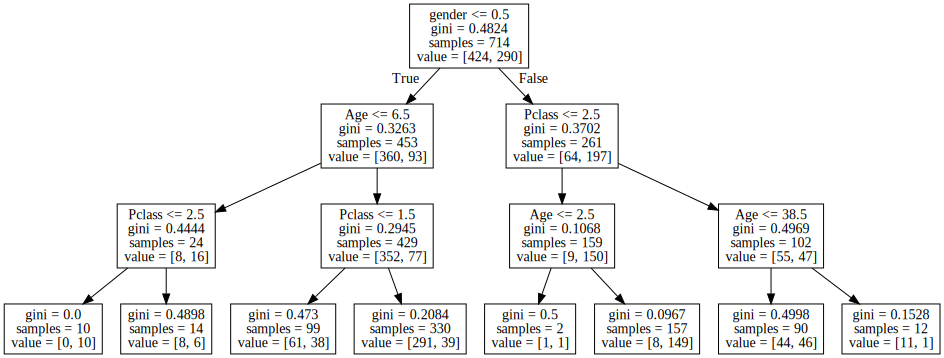

In [203]:
graph

In [282]:
graph.render("TitanicTree")

'TitanicTree.pdf'

In [283]:
!ls -ltr

total 53016
-rw-r--r--   1 fbb  staff   2301804 May  1  2014 chromedriver_linux64.zip
-rwxr-xr-x   1 fbb  staff  10840464 Oct  8  2015 chromedriver
-rw-r--r--@  1 fbb  staff     61194 Nov 14 00:57 train.csv
-rw-r--r--@  1 fbb  staff     28629 Nov 14 00:57 test.csv
-rw-r--r--@  1 fbb  staff      3258 Nov 14 00:57 gender_submission.csv
-rw-r--r--   1 fbb  staff      3807 Dec  9 09:44 README.md
drwxr-xr-x@ 11 fbb  staff       352 Dec  9 09:51 zipcode-2.0.0
-rwxr-xr-x@  1 fbb  staff  11924296 Dec  9 09:56 chromedriver.exe
-rw-r--r--   1 fbb  staff     11247 Dec  9 10:17 zillow_functions.py
drwxr-xr-x   4 fbb  staff       128 Dec  9 10:17 __pycache__
-rw-r--r--   1 fbb  staff     10603 Dec  9 10:20 zillow_functions.pyc
-rw-r--r--   1 fbb  staff    490762 Dec  9 10:53 2017-12-09_105310.csv
-rw-r--r--   1 fbb  staff      5703 Dec  9 10:55 zillow_runfile.py
-rw-r--r--   1 fbb  staff    190202 Dec  9 11:15 2017-12-09_111537.csv
-rw-r--r--   1 fbb  staff    680964 Dec  9 13:38 allzips.csv
-rw-r-

changing model to Random Forest

In [213]:
from sklearn import ensemble
clf =  ensemble.RandomForestClassifier(max_depth=3, criterion="gini", random_state=222).fit(titanic_short.values, titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.81932773109243695

changing max depth

In [214]:
clf =  ensemble.RandomForestClassifier(max_depth=4, criterion="gini", random_state=222).fit(titanic_short.values, titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.83893557422969189

In [215]:
clf =  ensemble.RandomForestClassifier(criterion="gini", random_state=222).fit(titanic_short.values, titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.89215686274509809

changing model to Gradient Boosted Trees

In [217]:
clf =  ensemble.GradientBoostingClassifier(max_depth=4, random_state=222).fit(titanic_short.values, titanic["Survived"])
clf.score(titanic_short.values, titanic["Survived"])

0.88935574229691872

In [271]:
ensemble.GradientBoostingClassifier?